In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score  # Import r2_score
from scipy.stats import skew

In [2]:
# Load the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')# Read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [4]:
test.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Ut

In [5]:
# Selecting features and target
train = train[['LotArea', 'BedroomAbvGr','BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'TotalBsmtSF',  'FullBath', 'SalePrice']]
test = test[['LotArea', 'BedroomAbvGr','BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'TotalBsmtSF',  'FullBath']]

In [6]:
# Log transform the target variable
train['SalePrice'] = np.log1p(train['SalePrice'])

/tmp/ipykernel_3254/3158605815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SalePrice'] = np.log1p(train['SalePrice'])


In [7]:
# Split data into features and target
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [8]:
#  Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [9]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Impute missing values in test data
imputer = SimpleImputer(strategy='mean')
X_test_scaled = imputer.fit_transform(X_test_scaled)

In [11]:
# Train Ridge regression model
ridge = Ridge(alpha=1.0)  # You can tune alpha
ridge.fit(X_train_scaled, y_train)

Ridge()

In [12]:
# Make predictions
predictions = ridge.predict(X_test_scaled)

In [13]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04909854342887821


In [14]:
# Calculate R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

R-squared: 0.7119123265153678


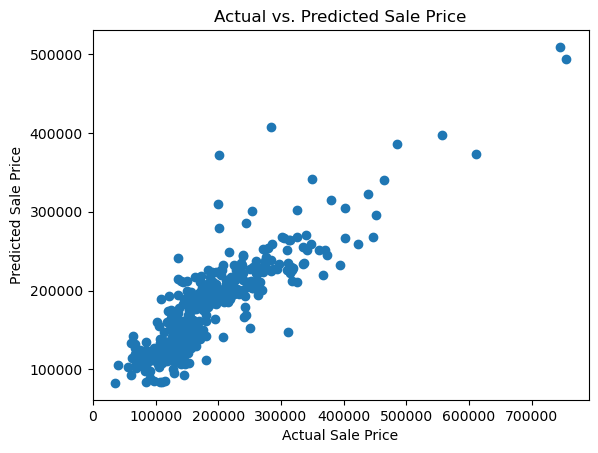

In [15]:
# Plot actual vs. predicted values
plt.scatter(np.expm1(y_test), np.expm1(predictions))
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.show()

In [16]:
# Impute missing values in test data for final prediction
test_scaled = scaler.transform(test)
test_scaled = imputer.transform(test_scaled)

In [17]:
# Predict SalePrice for test data
test_predictions = ridge.predict(test_scaled)

In [18]:
# Convert SalePrice predictions back to original scale
predicted_sale_price = np.expm1(test_predictions)

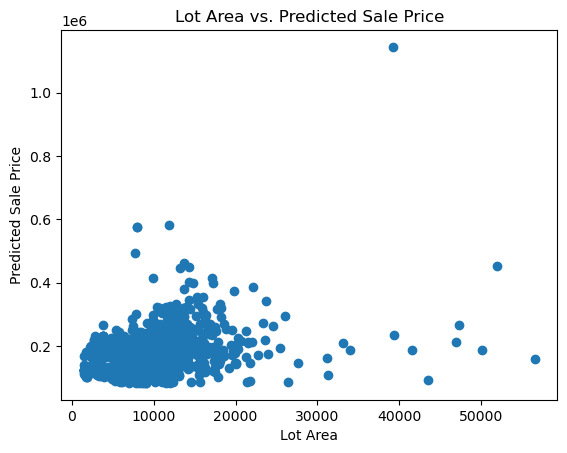

In [19]:
# Plot LotArea vs. Predicted Sale Price
plt.scatter(test['LotArea'], predicted_sale_price)
plt.xlabel('Lot Area')
plt.ylabel('Predicted Sale Price')
plt.title('Lot Area vs. Predicted Sale Price')
plt.show()